# Preparing the data for modeling

## Subsetting the dataset
 
When our flat-file is ready for modeling we have to procede to generate the partitions that we will use for modeling. No matter which method we will use for training our data, we have to generate first a test dataset. This test dataset has to be set on hold aside and only used at the end of the whole process of training and selecting the best model.
 
After we selected the test dataset we proceed to use the rest of the data for training the models. There are three main strategies for that:
 
* Dividing into train and dev
* Using Cross-validation
* Using Bootstrapping


## Test dataset

In [8]:
data <- read.csv("c:/Users/Mayer/Documents/DataScience/hackathon/train.csv/nona.train.csv")

In [2]:
head(data)

,ï..Label,device_id,timestamp,packet_length,Header_length,TSFT,Flags,Rate,Channel,dBm_Antenna_Noise,...,PWR_MGT,Destination_address,Source_address,BSS_Id,Sequence_number,Tagged_parameters_bytes,SSID,Supported_Rates,MAC_timestamp,TSF_timestamp
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>
1,10,1,1449824329,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
2,10,1,1449826933,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
3,10,1,1449827611,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
4,10,1,1449828140,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
5,10,1,1449829176,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
6,10,1,1449831703,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256


In [3]:
summary(data)

    ï..Label        device_id       timestamp         packet_length
 Min.   : 1.000   Min.   :    1   Min.   :1.360e+09   Min.   : 51  
 1st Qu.: 1.000   1st Qu.:  663   1st Qu.:1.366e+09   1st Qu.: 88  
 Median : 2.000   Median : 3712   Median :1.367e+09   Median :139  
 Mean   : 4.606   Mean   : 4747   Mean   :1.368e+09   Mean   :124  
 3rd Qu.:11.000   3rd Qu.: 7842   3rd Qu.:1.367e+09   3rd Qu.:150  
 Max.   :12.000   Max.   :14029   Max.   :1.450e+09   Max.   :296  
                                                                   
 Header_length        TSFT            Flags             Rate       
 Min.   :18.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:18.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :25.00   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :22.93   Mean   :0.5624   Mean   :0.4083   Mean   :0.9707  
 3rd Qu.:26.00   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :38.00   Max.   :1.0000   Max.   :1.0000

In [1]:
#table of types
#TypeTab <- NULL
#TypeTab <- cbind(Index=c(1:64),Type=sapply(data[,1:64],class))
#TypeTab

In [ ]:
# toFactor <- function(data) {
#    for (i in names(data)){
#        if (length(unique(data[[i]]))<5){
#            data[[i]] <- factor(data[[i]])
#        }
#    }
#    return(data)
# }
# data2 <- toFactor(data) 
# summary(data)
# summary(data2)

In [4]:
library(mechkar)

Warning message:
"package 'mechkar' was built under R version 3.6.3"


In [6]:
Table1(data = data,y = "Label")

Warning message in Table1(data = data, y = "Label"):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

V1,V2,Pop
<chr>,<chr>,<chr>
Variables,Categories,Population
Individuals,n,181960
ï..Label,Mean (SD),4.6 (4.3)
ï..Label,Median (IQR),2.0 (1.0-11.0)
ï..Label,Missing (%),--
device_id,Mean (SD),"4,746.7 (4,072.8)"
device_id,Median (IQR),"3,712.0 (663.0-7,842.0)"
device_id,Missing (%),--
timestamp,Mean (SD),"1,368,406,523.8 (14,286,865.2)"


## Test dataset

In [9]:
tab1 <- train_test(data = data, train_name = "train", test_name = "test",prop = 0.6, seed = 952, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "1"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "2"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |===================================================================== |  98%

Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"
Warning message in Ops.factor(pval, 0.05):
"'<' not meaningful for factors"
 

You got a perfectly balanced training and test datasets

 



In [7]:
df <- read.csv("c:/Users/Mayer/Documents/DataScience/hackathon/train.csv/nona.train.csv")
head(df)

,ï..Label,device_id,timestamp,packet_length,Header_length,TSFT,Flags,Rate,Channel,dBm_Antenna_Noise,...,PWR_MGT,Destination_address,Source_address,BSS_Id,Sequence_number,Tagged_parameters_bytes,SSID,Supported_Rates,MAC_timestamp,TSF_timestamp
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>
1,10,1,1449824329,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
2,10,1,1449826933,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
3,10,1,1449827611,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
4,10,1,1449828140,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
5,10,1,1449829176,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256
6,10,1,1449831703,112,38,0,0,0,0,0,...,0,00:00:00:00:00:00,c0:ee:fb:00:59:00,00:00:00:00:00:00,0,46,,1,824291256,824291256


In [8]:
dim(train)
dim(test)

[1] 109176     47

[1] 72784    47

In [9]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,181960,109176,72784,NA
ï..Label,Mean (SD),4.6 (4.3),4.6 (4.3),4.6 (4.3),NA
ï..Label,Median (IQR),2.0 (1.0-11.0),2.0 (1.0-11.0),2.0 (1.0-11.0),0.058
device_id,Mean (SD),"4,746.7 (4,072.8)","4,734.7 (4,071.8)","4,764.7 (4,074.1)",NA
device_id,Median (IQR),"3,712.0 (663.0-7,842.0)","3,693.0 (663.0-7,836.0)","3,740.0 (667.0-7,866.0)",0.123
timestamp,Mean (SD),"1,368,406,523.8 (14,286,865.2)","1,368,452,603.9 (14,401,168.6)","1,368,337,403.7 (14,113,490.9)",NA
timestamp,Median (IQR),"1,366,707,069.0 (1,365,768,194.0-1,367,316,311.2)","1,366,707,068.5 (1,365,768,421.0-1,367,316,335.0)","1,366,707,101.0 (1,365,767,607.2-1,367,316,256.2)",0.091
packet_length,Mean (SD),124.0 (43.0),123.8 (42.9),124.4 (43.2),NA
packet_length,Median (IQR),139.0 (88.0-150.0),139.0 (88.0-150.0),139.0 (88.0-150.0),0.004


In [12]:
 write.csv(test,"c:/Users/Mayer/Documents/DataScience/hackathon/train.csv/nona.train-test.csv",row.names = FALSE)

In [13]:
 write.csv(train,"c:/Users/Mayer/Documents/DataScience/hackathon/train.csv/nona.train-train.csv",row.names = FALSE)

In [12]:
glmmod <- glm(ï..Label ~., data=train)
pred <- ifelse(predict(glmmod, newdata=train,type='response')>=0.5,1,0)
table(pred=pred, obs =train$ï..Label)
#table(pred=ifelse(predict(mod, newdata=test,type='response')>=0.5,1,0), obs =test$NoShow)

ERROR: Error: cannot allocate vector of size 1.1 Gb


In [14]:
summary (glmmod)



Call:
glm(formula = NoShow ~ ., family = "binomial", data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-6.383e-06  -2.766e-06  -2.365e-06  -2.006e-06   2.085e-05  

Coefficients: (6 not defined because of singularities)
                     Estimate Std. Error z value Pr(>|z|)
(Intercept)        -2.390e+01  3.068e+05   0.000    1.000
sunday              9.294e-01  8.096e+04   0.000    1.000
monday             -8.457e-02  4.402e+05   0.000    1.000
saturday           -9.969e-02  2.488e+04   0.000    1.000
time_booked        -2.529e-03  1.378e+02   0.000    1.000
cancel_days_1       5.158e+01  4.250e+04   0.001    0.999
cancel_days_2       5.065e+01  6.276e+04   0.001    0.999
cancel_days_3      -4.484e+01  1.111e+05   0.000    1.000
cancel_days_4      -4.503e+01  1.459e+05   0.000    1.000
cancel_days_5      -4.524e+01  1.057e+05   0.000    1.000
cancel_days_6      -4.540e+01  1.059e+05   0.000    1.000
cancel_days_7              NA       

## Using VIF to find multicollinearity

In [15]:
car::vif(glmmod)

ERROR: Error in vif.default(glmmod): there are aliased coefficients in the model


In [16]:
formula <- as.formula(NoShow ~ .)
fit <-glm(formula, data = train,family='binomial')

#the linearly dependent variables
ld.vars <- attributes(alias(fit)$Complete)$dimnames[[1]]
ld.vars


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] "cancel_days_7" "service_CAS"   "Mclust3_3"     "Mclust4_1"    
[5] "Mclust4_3"     "Mclust4_4"

In [17]:
#remove the linearly dependent variables variables
formula.new <- as.formula(
    paste(
        paste(deparse(formula), collapse=""), 
        paste(ld.vars, collapse="-"),
        sep="-"
    )
)
formula.new

NoShow ~ . - cancel_days_7 - service_CAS - Mclust3_3 - Mclust4_1 - 
    Mclust4_3 - Mclust4_4

In [18]:
#run model again
glmmod.new <-glm(formula.new, data = train,family='binomial')
vifTable <-car::vif(glmmod.new)
vifTable

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


sunday             monday           saturday        time_booked 
          1.841706           1.526826           1.234566           7.958750 
     cancel_days_1      cancel_days_2      cancel_days_3      cancel_days_4 
          1.498174           1.224694           2.052566           1.515563 
     cancel_days_5      cancel_days_6        service_CAL       service_CALC 
          1.912680           2.305293           3.135415           1.507202 
      service_CBAL      service_CCAMO        service_CCO       service_CDPB 
          8.558420          10.871152           1.199844           3.940949 
       service_CFC      service_CHLFH     service_CHLFHC      service_CHLHH 
          1.866101           1.693174           1.530012           4.852386 
    service_CHLHHC     service_CHLPHC      service_CHLPL        service_CMT 
          2.616410           8.242612           1.726438           5.592947 
       service_CON         service_CT        service_FRI       service_MISC 
          3.377683           3.686076           6.584215           2.584494 
       service_SBD       service_SBD5       service_SDUD       service_SHCC 
          2.016652           8.248459           2.267788           4.871858 
      service_SHCW  service_SMARTBOND        service_SMO        staff_HOUSE 
          1.960591           4.914191           1.703760           2.358529 
       staff_KELLY  Canceled_By_BECKY     Canceled_By_JJ Canceled_By_JOANNE 
          1.380307           1.413206           3.464501           1.239815 
 Canceled_By_KELLY Canceled_By_SINEAD         quantity_1         quantity_2 
          2.137977           2.023579           1.010367           2.061865 
        quantity_5         quantity_6         quantity_7             amount 
          1.123620           1.187175           2.563654           2.248220 
     avg_receipt_4      avg_receipt_5     avg_quantity_5     total_cancel12 
          1.254435           1.460518           1.373062           1.857894 
         hclust3_1          hclust4_4          Mclust3_1          Mclust3_2 
          9.368239           2.654139         129.268669         166.722877 
         Mclust4_2 
          1.558096

In [19]:
#a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity
varSel5 <- names(which(vifTable>5))
varSel5
varSel10 <- names(which(vifTable>10))
varSel10

[1] "time_booked"    "service_CBAL"   "service_CCAMO"  "service_CHLPHC"
 [5] "service_CMT"    "service_FRI"    "service_SBD5"   "hclust3_1"     
 [9] "Mclust3_1"      "Mclust3_2"

[1] "service_CCAMO" "Mclust3_1"     "Mclust3_2"

In [20]:
# Build a model excluding varSel5 variables

formula5 <-as.formula(
    paste(
        paste(deparse(formula), collapse=""), 
        paste(varSel5, collapse="-"),
        sep="-"
    )
)
formula5

# Build a model excluding  varSel10 variables

formula10 <-as.formula(
    paste(
        paste(deparse(formula), collapse=""), 
        paste(varSel10, collapse="-"),
        sep="-"
    )
)
formula10

NoShow ~ . - time_booked - service_CBAL - service_CCAMO - service_CHLPHC - 
    service_CMT - service_FRI - service_SBD5 - hclust3_1 - Mclust3_1 - 
    Mclust3_2

NoShow ~ . - service_CCAMO - Mclust3_1 - Mclust3_2

In [21]:
#excluding varSel5
glmmod1 <- glm(formula5, data=train,family='binomial')
pred <- ifelse(predict(glmmod1, newdata=train,type='response')>=0.5,1,0)
table(pred=pred, obs =train$NoShow)
table(pred=ifelse(predict(glmmod1, newdata=test,type='response')>=0.5,1,0), obs =test$NoShow)

#excluding varSel10
glmmod2 <- glm(formula10, data=train,family='binomial')
pred <- ifelse(predict(glmmod2, newdata=train,type='response')>=0.5,1,0)
table(pred=pred, obs =train$NoShow)
table(pred=ifelse(predict(glmmod2, newdata=test,type='response')>=0.5,1,0), obs =test$NoShow)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


    obs
pred Show NoShow
   0 1200      0
   1    0    110

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


    obs
pred Show NoShow
   0  813      0
   1    0     61

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


    obs
pred Show NoShow
   0 1200      0
   1    0    110

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


    obs
pred Show NoShow
   0  813      0
   1    0     61

In [22]:
library(glmnet)

Loading required package: Matrix

Loading required package: foreach

Loaded glmnet 2.0-18




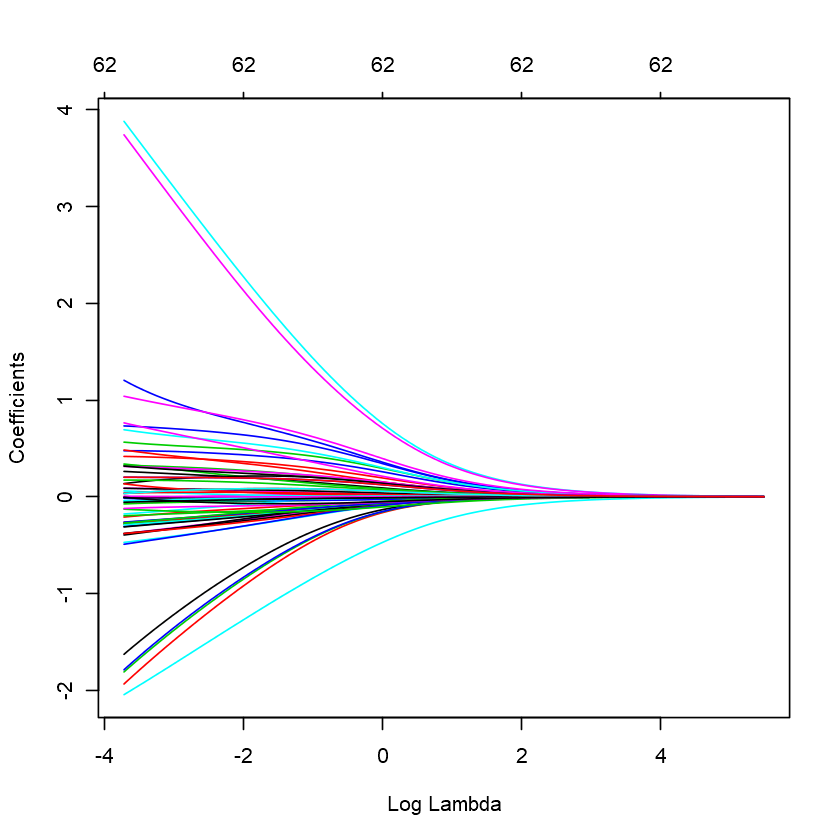

In [139]:
x <- as.matrix(train[2:64])
y <- as.factor(train$NoShow)
glmmod3 <- glmnet(x,y, alpha=0, family="binomial")

# Plot variable coefficients vs. shrinkage parameter lambda.
plot(glmmod3, xvar="lambda")

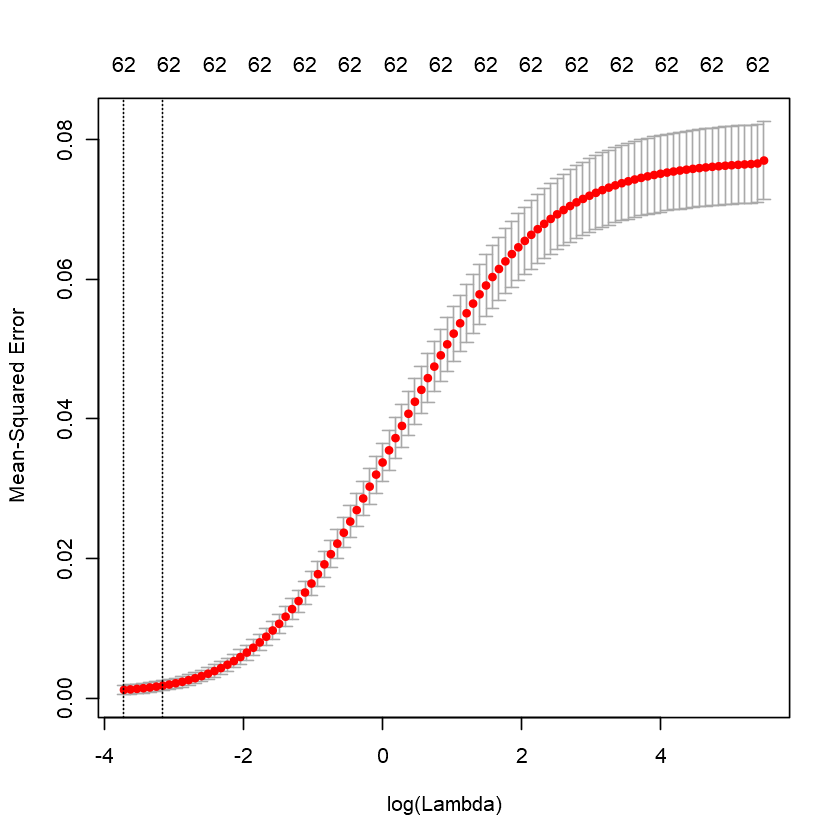

In [137]:
cv.glmmod3 <- cv.glmnet(x, y=train$NoShow, alpha=0)
plot(cv.glmmod3)

In [138]:
(best.lambda <- cv.glmmod3$lambda.min)

[1] 0.02412967

In [10]:
# droping 'cancel_day_*' before spliting to train and test might solve the multicollinearity problme
drops <- c("cancel_days_1","cancel_days_2","cancel_days_3","cancel_days_4","cancel_days_5","cancel_days_6","cancel_days_7")
data2 <- data[ , !(names(data) %in% drops)]
head(data2,2)

,NoShow,sunday,monday,saturday,time_booked,service_CAL,service_CALC,service_CAS,service_CBAL,service_CCAMO,...,total_cancel12,hclust3_1,hclust4_4,Mclust3_1,Mclust3_2,Mclust3_3,Mclust4_1,Mclust4_2,Mclust4_3,Mclust4_4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,510,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,1080,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [24]:
Table1(data = data2,y = "NoShow")

Warning message in Table1(data = data2, y = "NoShow"):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "Show"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "NoShow"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |===================================================================== |  98%

Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


V1,V2,Pop,Show,NoShow,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,2184,2013,171,NA
NoShow,Show,"2,013 (92.2%)","2,013 (100.0%)",0 (0.0%),NA
NoShow,NoShow,171 (7.8%),0 (0.0%),171 (100.0%),0
sunday,Mean (SD),0.0 (0.2),0.0 (0.2),0.1 (0.3),NA
sunday,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.028
monday,Mean (SD),0.0 (0.0),0.0 (0.0),0.0 (0.0),NA
monday,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.318
saturday,Mean (SD),0.2 (0.4),0.2 (0.4),0.2 (0.4),NA
saturday,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.182


In [11]:
# spliting to train and test
tab2 <- train_test(data = data2, train_name = "train2", test_name = "test2",prop = 0.6, seed = 952, tableone=T)

Dataset partitioned into:

 + Train dataset: train2

 + Test dataset: test2

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "1"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |======================================================================| 100%

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "2"):
"invalid factor level, NA generated"
Warning message:
"Column `Del` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `V2` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"


  |===================================================================== |  98%

Warning message:
"Column `V1` joining character vector and factor, coercing into character vector"
Warning message:
"Column `n` joining character vector and factor, coercing into character vector"
Warning message in Ops.factor(pval, 0.05):
"'<' not meaningful for factors"
 

You got a perfectly balanced training and test datasets

 



In [26]:
dim(train2)
dim(test2)

[1] 1310   57

[1] 874  57

In [27]:
tab2

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,2184,1310,874,NA
NoShow,Show,"2,013 (92.2%)","1,200 (91.6%)",813 (93.0%),NA
NoShow,NoShow,171 (7.8%),110 (8.4%),61 (7.0%),0.26
sunday,Mean (SD),0.0 (0.2),0.0 (0.2),0.0 (0.2),NA
sunday,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.614
monday,Mean (SD),0.0 (0.0),0.0 (0.0),0.0 (0.0),NA
monday,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.318
saturday,Mean (SD),0.2 (0.4),0.2 (0.4),0.2 (0.4),NA
saturday,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.269


In [12]:
write.csv(test2,"C:\\Users\\Mayer\\Documents\\DataScience\\project\\Noshows\\NoShowTest.csv",row.names = FALSE)

In [13]:
write.csv(train2,"C:\\Users\\Mayer\\Documents\\DataScience\\project\\Noshows\\NoShowTrain.csv",row.names = FALSE)

In [32]:
# checking the spliting before Cross Validation
glmmod4 <- glm(NoShow ~., data=train2,family='binomial')
pred <- ifelse(predict(glmmod4, newdata=train2,type='response')>=0.5,1,0)
table(pred=pred, obs =train2$NoShow)
table(pred=ifelse(predict(glmmod4, newdata=test2,type='response')>=0.5,1,0), obs =test2$NoShow)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


    obs
pred Show NoShow
   0 1176     48
   1   24     62

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


    obs
pred Show NoShow
   0  787     38
   1   26     23

In [141]:
#threshold <- 0.05
 # signif_form <-
  #  as.formula(paste("NoShow ~ ",
   # paste(names(which((summary(glmmod)$coefficients[2:(nrow(summary(glmmod)$coefficients)), 4] < threshold) == TRUE)),
    #collapse = "+")))
 # linear_model <- glm(signif_form, data = data)
  #summary(linear_model)

In [55]:
# library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


In [59]:
#library(GGally)
#pairs <-ggpairs(data[,2:64])
#options(repr.plot.width = 40, repr.plot.height = 40)


In [149]:
#pairs$plots

In [150]:
#summary(lmmod)$coefficients[2:(nrow(summary(lmmod)$coefficients)),4]

# Dataset Imbalance

In [34]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance

Warning message:
"package 'imbalance' was built under R version 3.6.3"
Loading required package: ROSE

Loaded ROSE 0.0-3




In [35]:
table(train2$NoShow)
table(train2$NoShow)/nrow(train2)*100


  Show NoShow 
  1200    110 


     Show    NoShow 
91.603053  8.396947 

In [40]:
numZero <- length(which(train2$NoShow == "Show"))
numOne <- length(which(train2$NoShow == "NoShow"))
nInstances <- numZero - numOne
cbind(numZero=numZero,numOne=numOne,nInstances=nInstances)

numZero,numOne,nInstances
1200,110,1090


#### I want to check all imbalance sampling techniques to choose the beter one

## Under Sampling
 
This techniques uses all the rows containing the minority class and select randomly the same number of minority class for the rows with the majority class 

In [41]:
data_balanced_under <- ovun.sample(NoShow ~ ., data = train2, method = "under",N = numOne*2)$data
table(data_balanced_under$NoShow)


  Show NoShow 
   110    110 

## Over Sampling
 
Over sampling takes the number of rows of the mayority class and repeat the rows of the minority class up to the same number of the mayority class. The repeated rows are selected randomly.

In [42]:
#over sampling
data_balanced_over <- ovun.sample(NoShow ~ ., data = train2, method = "over",N = numZero*2)$data
table(data_balanced_over$NoShow)


  Show NoShow 
  1200   1200 

## Over-Under Sampling
 
In this technique we randomly select half of the majority class rows (under sampling) and increment the minority class rows by selecting them randomly.   

In [43]:
#over_under sampling
data_balanced_both <- ovun.sample(NoShow ~ ., data = train2, method = "both", p=0.5,N = 1200, seed = 1)$data
table(data_balanced_both$NoShow)


  Show NoShow 
   628    572 

## ROSE (Random Over-Sampling Examples) 
 
Creates a sample of synthetic data by enlarging the features space of minority and majority class examples. ROSE selects an observation belonging to the class k and generates new examples in its neighbourhood

In [44]:
# Rose: 
data.rose <- ROSE(NoShow ~ ., data = train2, seed = 1)$data
table(data.rose$NoShow)


  Show NoShow 
   685    625 

## Oversampling with Synthetic data
 
Additionally to ROSE. The package 'inbalance' has the function pdfos. This function generates synthetic minority examples for a numerical dataset approximating a Gaussian multivariate distribution.

In [46]:
#newSamples <- pdfos(dataset = train2, numInstances = nInstances,classAttr = "NoShow")
#newDataset <- rbind(train2, newSamples)
#table(newDataset$NoShow)

In [99]:
#data.smote <- SMOTE(NoShow ~ ., data = train, perc.over = 200, k = 5, perc.under = 200)
#table(data.smote$NoShow)

## Models

In [54]:
mod1 <- glm(NoShow ~., family='binomial', data=train2)
pred1 <- ifelse(predict(mod1, newdata=train2,type='response')>=0.5,"NoShow","Show")
table(pred=pred1, obs =train2$NoShow)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


        obs
pred     Show NoShow
  NoShow   24     62
  Show   1176     48

In [56]:
mod2 <- glm(NoShow ~., family='binomial', data=data_balanced_under)
pred2 <- ifelse(predict(mod2, newdata=data_balanced_under,type='response')>=0.5,"NoShow","Show")
table(pred=pred2, obs =data_balanced_under$NoShow)
table(pred=ifelse(predict(mod2, newdata=train2,type='response')>=0.5,"NoShow","Show"), obs =train2$NoShow)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


        obs
pred     Show NoShow
  NoShow    8    106
  Show    102      4

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


        obs
pred     Show NoShow
  NoShow  191    106
  Show   1009      4

In [57]:
mod3 <- glm(NoShow ~., family='binomial', data=data_balanced_over)
pred3 <- ifelse(predict(mod3, newdata=data_balanced_over,type='response')>=0.5,"NoShow","Show")
table(pred=pred3, obs =data_balanced_over$NoShow)
table(pred=ifelse(predict(mod3, newdata=train2,type='response')>=0.5,"NoShow","Show"), obs =train$NoShow)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


        obs
pred     Show NoShow
  NoShow  125   1164
  Show   1075     36

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


        obs
pred     Show NoShow
  NoShow  125    106
  Show   1075      4

In [58]:
mod4 <- glm(NoShow ~., family='binomial', data=data_balanced_both)
pred4 <- ifelse(predict(mod4, newdata=data_balanced_both,type='response')>=0.5,"NoShow","Show")
table(pred=pred4, obs =data_balanced_both$NoShow)
table(pred=ifelse(predict(mod4, newdata=train2,type='response')>=0.5,"NoShow","Show"), obs =train$NoShow)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


        obs
pred     Show NoShow
  NoShow   52    550
  Show    576     22

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


        obs
pred     Show NoShow
  NoShow  113    104
  Show   1087      6

In [109]:
mod5 <- glm(NoShow ~., family='binomial', data=data.rose)
pred5 <- ifelse(predict(mod5, newdata=data.rose,type='response')>=0.5,"NoShow","Show")
table(pred=pred5, obs =data.rose$NoShow)
table(pred=ifelse(predict(mod5, newdata=train,type='response')>=0.5,"NoShow","Show"), obs =train$NoShow)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


    obs
pred   0   1
   0 685   0
   1   0 625

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


    obs
pred    0    1
   0 1176    0
   1   24  110

# Cross-Validation

<img src="https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif"/>


In [12]:
#install.packages("caret", dependencies = c("Depends", "Suggests"))
#remove.packages('caret')

Installing package into 'C:/Users/Mayer/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mayer\AppData\Local\Temp\RtmpyKJzJR\downloaded_packages


In [59]:
library('caret')
if(!require(DMwR)) {install.packages("DMwR");require(DMwR)}
library(dplyr)
if(!require(MLeval)) {install.packages("MLeval");require(MLeval)}

Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: DMwR

Warning message:
"package 'DMwR' was built under R version 3.6.3"
Loading required package: grid

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: MLeval

Warning message:
"package 'MLeval' was built under R version 3.6.3"

Attaching package: 'MLeval'


The following object is masked _by_ '.GlobalEnv':

    fit




In [14]:
#install.packages('recipes')
#install.packages('ModelMetrics')

In [60]:
set.seed(1065)
seeds <- vector(mode = "list", length = 51)
for(i in 1:50) seeds[[i]] <- sample.int(1000, 22)

## For the last model:
seeds[[51]] <- sample.int(1000, 1)

In [61]:
# checking for variables with less then 1  level
l <- sapply(train2, function(x) is.factor(x))
m <- train2[, l]
n <- ifelse( sapply(m, function(x) length(levels(x))) == 1, "DROP", "NODROP")
n<-as.data.frame(n)
dv <- n %>% tibble::rownames_to_column() %>% filter (n=='DROP')
(dv <- dv$rowname)

character(0)

In [75]:
#vn <- setdiff(names(temp),dv)
#temp2 <- temp[,vn]
#head(temp2)

In [62]:
# define training control
# Samplig is used to resolve class imbalances
train_control <- caret::trainControl(method = "repeatedcv", repeats = 5, seeds=seeds,classProbs = TRUE, summaryFunction = twoClassSummary) # no sampling
train_control_down <- caret::trainControl(method = "repeatedcv", repeats = 5, seeds=seeds,sampling='down',classProbs = TRUE, summaryFunction = twoClassSummary)
train_control_up <- caret::trainControl(method = "repeatedcv", repeats = 5, seeds=seeds,sampling='up',classProbs = TRUE, summaryFunction = twoClassSummary)
train_control_rose <- caret::trainControl(method = "repeatedcv", repeats = 5, seeds=seeds,sampling='rose',classProbs = TRUE, summaryFunction = twoClassSummary)
train_control_smote <- caret::trainControl(method = "repeatedcv", repeats = 5, seeds=seeds,sampling='smote',classProbs = TRUE, summaryFunction = twoClassSummary)
# train the model
model <- train(NoShow~., data=train2, trControl=train_control, method="ranger", metric='ROC')
model_down <- train(NoShow~., data=train2, trControl=train_control_down, method="ranger", metric='ROC')
model_up <- train(NoShow~., data=train2, trControl=train_control_up, method="ranger", metric='ROC')
model_rose <- train(NoShow~., data=train2, trControl=train_control_rose, method="ranger", metric='ROC')
model_smote <- train(NoShow~., data=train2, trControl=train_control_smote, method="ranger", metric='ROC')

In [134]:
#str(train2)

In [138]:
#factor(train$Mclust4, levels=c(1,2,3,4))

In [44]:
#train$hclust4 <- paste(make.names(train$hclust4),collapse = ", ")

In [66]:
#x <- evalm(model_smote)
#x$roc
model_up$modelInfo

,mtry,min.node.size,splitrule,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,gini,0.9121894,0.00000000,1.0000000,0.04336706,0.00000000,0.00000000
2,2,1,extratrees,0.9092045,0.59700000,0.9800000,0.03716672,0.07160217,0.04224274
3,29,1,gini,0.8860000,0.03216667,0.9963636,0.05363130,0.14986776,0.02571297
4,29,1,extratrees,0.9226591,0.03000000,0.9981818,0.03743257,0.10039604,0.01285649
5,56,1,gini,0.8781591,0.18450000,0.9818182,0.07533620,0.34585335,0.05194805
6,56,1,extratrees,0.9221136,0.03416667,0.9981818,0.04022466,0.11552220,0.01285649


In [26]:
# summarize results
print(model)
print(model_down)
print(model_up)
print(model_rose)
print(model_smote)

Random Forest 

1310 samples
  56 predictor
   2 classes: 'Show', 'NoShow' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1179, 1179, 1179, 1179, 1179, 1179, ... 
Resampling results across tuning parameters:

  mtry  splitrule   ROC        Sens       Spec     
   2    gini        0.9289470  1.0000000  0.0000000
   2    extratrees  0.9262348  1.0000000  0.0000000
  29    gini        0.9407424  0.9641667  0.4272727
  29    extratrees  0.9405682  0.9615000  0.4490909
  56    gini        0.9278864  0.9631667  0.4272727
  56    extratrees  0.9305985  0.9578333  0.4454545

Tuning parameter 'min.node.size' was held constant at a value of 1
ROC was used to select the optimal model using the largest value.
The final values used for the model were mtry = 29, splitrule = gini
 and min.node.size = 1.
Random Forest 

1310 samples
  56 predictor
   2 classes: 'Show', 'NoShow' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 t

In [89]:
data.frame('Model'= c('model','model_down','model_up','model_rose','model_smote'),
     'ROC'= c(model$results$ROC[model$results$mtry ==29 & model$results$splitrule == 'gini' ],
              model_down$results$ROC[model_down$results$mtry ==29 & model_down$results$splitrule == 'gini'],
              model_up$results$ROC[model_up$results$mtry ==29 & model_up$results$splitrule == 'gini'],
              model_rose$results$ROC[model_rose$results$mtry ==29 & model_rose$results$splitrule == 'gini'],
              model_smote$results$ROC[model_smote$results$mtry ==29 & model_smote$results$splitrule == 'gini']))


Model,ROC
<fct>,<dbl>
model,0.9407424
model_down,0.9320909
model_up,0.9349545
model_rose,0.8860000
model_smote,0.9359318


### Model with no samplig shows the best result